In [5]:
import model as m
from sklearn.svm import LinearSVC

clf_linear = m.Classifier(0,LinearSVC())

In [6]:
#stop word sets specified for this data set
path = "../data/stop_words_imbd/"
with open(path+"stop_words_no_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)

In [13]:
#base model with default hyper parameters 

params = {}
clf_linear.fit(params,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1 candidates, totalling 5 fits
done in 15.545s

scores!
mean: 0.892 std: (+/-0.007) for {}
Best score:
0.892 (+/-0.007)
with parameters set:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.7s finished


In [14]:
clf_linear.clf.cv_results_

{'mean_fit_time': array([4.19744945]),
 'std_fit_time': array([0.03724658]),
 'mean_score_time': array([0.89590116]),
 'std_score_time': array([0.03830492]),
 'params': [{}],
 'split0_test_score': array([0.8962]),
 'split1_test_score': array([0.8896]),
 'split2_test_score': array([0.895]),
 'split3_test_score': array([0.8908]),
 'split4_test_score': array([0.8862]),
 'mean_test_score': array([0.89156]),
 'std_test_score': array([0.00364725]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.99145]),
 'split1_train_score': array([0.9932]),
 'split2_train_score': array([0.99215]),
 'split3_train_score': array([0.99285]),
 'split4_train_score': array([0.99185]),
 'mean_train_score': array([0.9923]),
 'std_train_score': array([0.00064187])}

In [6]:
params_trial_1_linear = { 
    'vect__max_features': (30000,50000),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'tfidf__norm': ('l1','l2'),
    'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums,None],
    'vect__max_df':(0.2,0.3,0.4),
    'clf__C': (0.5,1),
}
#### TEST 1 looking at linear kernel function ####
clf_linear.fit(params_trial_1_linear,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 144 candidates, totalling 720 fits
done in 2109.137s

scores!
mean: 0.861 std: (+/-0.009) for {'clf__C': 0.5, 'tfidf__norm': 'l1', 'vect__max_df': 0.2, 'vect__max_features': 30000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.860 std: (+/-0.010) for {'clf__C': 0.5, 'tfidf__norm': 'l1', 'vect__max_df': 0.2, 'vect__max_features': 30000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.862 std: (+/-0.007) for {'clf__C': 0.5, 'tfidf__norm': 'l1', 'vect__max_df': 0.2, 'vect__max_features': 30000, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}
mean: 0.865 std: (+/-0.011) for {'clf__C': 0.5, 'tfidf__norm': 'l1', 'vect__max_df': 0.2, 'vect__max_features': 30000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.865 std: (+/-0.012) for {'clf__C': 0.5, 'tfidf__norm': 'l1', 'vect__max_df': 0.2, 'vect__max_features': 30000, 'vect__ngram_range': (1, 2), 'vect__stop_wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 34.8min finished


In [7]:
clf_linear.eval_best_n_params(0.8)
clf_linear.eval_best_n_params(0.9)
clf_linear.eval_best_n_params(0.95)


Finding most common params for the top 29 values
[{1: 11, 0.5: 18}, {'l2': 29}, {0.2: 9, 0.3: 10, 0.4: 10}, {50000: 17, 30000: 12}, {(1, 2): 29}, {0: 9, 1: 8, None: 12}]
Finding most common params for the top 15 values
[{0.5: 12, 1: 3}, {'l2': 15}, {0.2: 5, 0.3: 5, 0.4: 5}, {50000: 12, 30000: 3}, {(1, 2): 15}, {1: 3, 0: 3, None: 9}]
Finding most common params for the top 8 values
[{1: 3, 0.5: 5}, {'l2': 8}, {0.4: 2, 0.2: 3, 0.3: 3}, {50000: 6, 30000: 2}, {(1, 2): 8}, {None: 8}]


In [11]:
params_trial_2_linear = { 
    'vect__max_features': (30000,50000,100000),
    'vect__ngram_range': [(1, 2)],
    'tfidf__norm': [('l2')],
    'vect__max_df':(0.1,0.15,0.2,0.25),
    'clf__C': (0.3,0.4,0.5,1),
}
#### TEST 1 looking at linear kernel function ####
clf_linear.fit(params_trial_2_linear,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
done in 1185.038s

scores!
mean: 0.901 std: (+/-0.010) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.1, 'vect__max_features': 30000, 'vect__ngram_range': (1, 2)}
mean: 0.903 std: (+/-0.011) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.1, 'vect__max_features': 50000, 'vect__ngram_range': (1, 2)}
mean: 0.905 std: (+/-0.011) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.1, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2)}
mean: 0.903 std: (+/-0.015) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.15, 'vect__max_features': 30000, 'vect__ngram_range': (1, 2)}
mean: 0.905 std: (+/-0.010) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.15, 'vect__max_features': 50000, 'vect__ngram_range': (1, 2)}
mean: 0.906 std: (+/-0.011) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.15, 'vect__max_featu

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.4min finished


In [12]:
clf_linear.eval_best_n_params(0.8)
clf_linear.eval_best_n_params(0.9)
clf_linear.eval_best_n_params(0.95)


Finding most common params for the top 10 values
[{1: 1, 0.3: 3, 0.4: 3, 0.5: 3}, {'l2': 10}, {0.25: 4, 0.2: 3, 0.15: 3}, {100000: 10}, {(1, 2): 10}]
Finding most common params for the top 5 values
[{0.3: 1, 0.5: 2, 0.4: 2}, {'l2': 5}, {0.15: 3, 0.25: 2}, {100000: 5}, {(1, 2): 5}]
Finding most common params for the top 3 values
[{0.4: 2, 0.5: 1}, {'l2': 3}, {0.15: 1, 0.25: 2}, {100000: 3}, {(1, 2): 3}]


In [7]:
params_trial_3_linear = { 
    'vect__max_features': (100000,150000,200000),
    'vect__ngram_range': [(1, 2)],
    'tfidf__norm': [('l2')],
    'vect__max_df':(0.2,0.25,0.3,0.35),
    'clf__C': (0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7),
}
#### TEST 1 looking at linear kernel function ####
clf_linear.fit(params_trial_3_linear,5)


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 108 candidates, totalling 540 fits
done in 2701.771s

scores!
mean: 0.907 std: (+/-0.003) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.2, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2)}
mean: 0.907 std: (+/-0.002) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.2, 'vect__max_features': 150000, 'vect__ngram_range': (1, 2)}
mean: 0.907 std: (+/-0.002) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.2, 'vect__max_features': 200000, 'vect__ngram_range': (1, 2)}
mean: 0.906 std: (+/-0.004) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.25, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2)}
mean: 0.906 std: (+/-0.003) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.25, 'vect__max_features': 150000, 'vect__ngram_range': (1, 2)}
mean: 0.906 std: (+/-0.003) for {'clf__C': 0.3, 'tfidf__norm': 'l2', 'vect__max_df': 0.25, 'vect__max_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 44.8min finished


In [8]:
clf_linear.eval_best_n_params(0.8)
clf_linear.eval_best_n_params(0.9)
clf_linear.eval_best_n_params(0.95)


Finding most common params for the top 22 values
[{0.6: 4, 0.35: 1, 0.55: 3, 0.4: 2, 0.7: 4, 0.65: 4, 0.5: 2, 0.45: 2}, {'l2': 22}, {0.3: 3, 0.2: 15, 0.25: 4}, {200000: 15, 150000: 7}, {(1, 2): 22}]
Finding most common params for the top 11 values
[{0.65: 3, 0.5: 1, 0.6: 2, 0.7: 2, 0.45: 1, 0.55: 2}, {'l2': 11}, {0.2: 9, 0.25: 2}, {150000: 3, 200000: 8}, {(1, 2): 11}]
Finding most common params for the top 6 values
[{0.45: 1, 0.55: 2, 0.7: 1, 0.6: 1, 0.65: 1}, {'l2': 6}, {0.2: 6}, {200000: 5, 150000: 1}, {(1, 2): 6}]


In [10]:
params_trial_4_linear = { 
    'vect__max_features': (200000,None),
    'vect__ngram_range': [(1, 2)],
    'tfidf__norm': [('l2')],
    'vect__max_df':(0.1,0.15,0.2),
    'clf__C': (0.45,0.5,0.55,0.6,0.65,0.7),
}
#### TEST 1 looking at linear kernel function ####
clf_linear.fit(params_trial_4_linear,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 36 candidates, totalling 180 fits
done in 985.434s

scores!
mean: 0.908 std: (+/-0.005) for {'clf__C': 0.45, 'tfidf__norm': 'l2', 'vect__max_df': 0.1, 'vect__max_features': 200000, 'vect__ngram_range': (1, 2)}
mean: 0.907 std: (+/-0.003) for {'clf__C': 0.45, 'tfidf__norm': 'l2', 'vect__max_df': 0.1, 'vect__max_features': None, 'vect__ngram_range': (1, 2)}
mean: 0.908 std: (+/-0.004) for {'clf__C': 0.45, 'tfidf__norm': 'l2', 'vect__max_df': 0.15, 'vect__max_features': 200000, 'vect__ngram_range': (1, 2)}
mean: 0.907 std: (+/-0.002) for {'clf__C': 0.45, 'tfidf__norm': 'l2', 'vect__max_df': 0.15, 'vect__max_features': None, 'vect__ngram_range': (1, 2)}
mean: 0.908 std: (+/-0.003) for {'clf__C': 0.45, 'tfidf__norm': 'l2', 'vect__max_df': 0.2, 'vect__max_features': 200000, 'vect__ngram_range': (1, 2)}
mean: 0.907 std: (+/-0.003) for {'clf__C': 0.45, 'tfidf__norm': 'l2', 'vect__max_df': 0.2, 'vect__max_f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 16.0min finished


In [11]:
clf_linear.eval_best_n_params(0.8)
clf_linear.eval_best_n_params(0.9)
clf_linear.eval_best_n_params(0.95)

Finding most common params for the top 8 values
[{0.55: 2, 0.6: 2, 0.7: 2, 0.65: 2}, {'l2': 8}, {0.1: 4, 0.2: 4}, {200000: 5, None: 3}, {(1, 2): 8}]
Finding most common params for the top 4 values
[{0.6: 1, 0.65: 2, 0.7: 1}, {'l2': 4}, {0.2: 2, 0.1: 2}, {200000: 2, None: 2}, {(1, 2): 4}]
Finding most common params for the top 2 values
[{0.65: 1, 0.7: 1}, {'l2': 2}, {0.1: 2}, {None: 2}, {(1, 2): 2}]


Evaluation on test set:

Accuracy Score : 0.90424
Precision Score : 0.90424
Recall Score : 0.90424
F1 Score : 0.9042400000000002
Confusion Matrix
[[11288  1213]
 [ 1181 11318]]


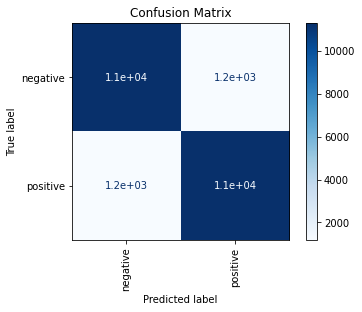

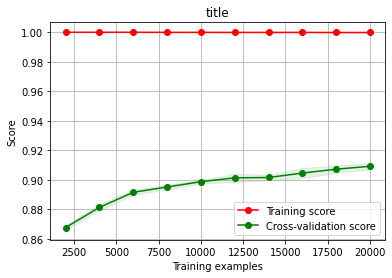

In [12]:
clf_linear.eval_on_test([],True)
clf_linear.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])